#  Educación Femenina en Sudamérica (2018–2024)
📊 **Código del indicador WB:** SE.SEC.CUAT.LO.FE.ZS

---

##  Enfoque de análisis:

La finalización de la secundaria por parte de las mujeres es un indicador clave para comprender el desarrollo humano, la equidad de género y las posibilidades de movilidad social. Este porcentaje revela cuántas mujeres, dentro de una cohorte de edad esperada, han logrado culminar al menos el primer nivel de educación secundaria.


# Código para obtener datos de educación femenina en Sudamérica desde la API del Banco Mundial

In [75]:
!pip install matplotlib


In [68]:
import requests  # Importa la librería requests para hacer solicitudes HTTP a APIs.
import pandas as pd  # Importa pandas, una biblioteca para análisis y manipulación de datos.
import matplotlib.pyplot as plt  # Importa matplotlib para crear gráficos (aunque no se usa aquí).
from tqdm import tqdm  # Importa tqdm para mostrar una barra de progreso durante los bucles.

# --- Lista de países sudamericanos (códigos ISO) sin Guyana ni Surinam
paises = {
    "AR": "Argentina", "BO": "Bolivia", "BR": "Brasil", "CL": "Chile",
    "CO": "Colombia", "EC": "Ecuador", "PY": "Paraguay", "PE": "Perú",
    "UY": "Uruguay", "VE": "Venezuela"
}

# --- Parámetros
indicador = "SE.SEC.CUAT.LO.FE.ZS"  # Código del indicador del Banco Mundial: mujeres con educación secundaria completa (%)
anios = "2018:2024"  # Rango de años a consultar

# --- Lista para guardar resultados
datos = []  # Lista vacía donde se almacenarán los datos obtenidos del API

# --- Consulta país por país con barra de progreso
for codigo, nombre in tqdm(paises.items(), desc="Consultando países"):  # Itera sobre cada país mostrando barra de progreso
    url = f"https://api.worldbank.org/v2/country/{codigo}/indicator/{indicador}?date={anios}&format=json&per_page=100"  # Construye la URL de la API con los parámetros
    response = requests.get(url)  # Realiza la solicitud GET a la API
    if response.status_code != 200:  # Si la respuesta no fue exitosa, salta al siguiente país
        continue
    data = response.json()[1]  # Obtiene la segunda parte del JSON (donde están los datos)

    for item in data:  # Itera sobre cada año de datos recibidos para el país
        if item["value"] is not None:  # Verifica que el valor no sea nulo
            datos.append({  # Agrega los datos a la lista como un diccionario
                "País": nombre,
                "Año": int(item["date"]),
                "Educación (%)": round(item["value"], 2)  # Redondea el valor a 2 decimales
            })

# --- Crear DataFrame
df = pd.DataFrame(datos)  # Crea un DataFrame de pandas a partir de la lista de datos
df = df.sort_values(by=["País", "Año"])  # Ordena el DataFrame por país y año

# --- Convertir el índice en una columna llamada 'Indicador'
df = df.reset_index().rename(columns={"index": "Indicador"})  # Resetea el índice y renombra la columna generada como 'Indicador'

# --- Mostrar resultado
df  # Muestra el DataFrame final

Consultando países: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.68it/s]


,Indicador,País,Año,Educación (%)
0,5,Bolivia,2018,53.48
1,4,Bolivia,2019,57.31
2,3,Bolivia,2020,58.08
3,2,Bolivia,2021,58.41
4,1,Bolivia,2022,56.27
5,0,Bolivia,2023,57.39
6,11,Brasil,2018,63.20
7,10,Brasil,2019,64.46
8,9,Brasil,2020,66.66
9,8,Brasil,2021,67.40


In [69]:
# --- Guardar en archivo CSV
df.to_csv("educacion_femenina_sudamerica_2018_2024.csv", index=False)



# 📊 Análisis comparativo de la finalización de secundaria en mujeres sudamericanas
El gráfico muestra una evolución positiva o estable en la mayoría de países sudamericanos respecto al porcentaje de mujeres que completaron la secundaria. Sin embargo, también se evidencian diferencias significativas entre países, lo que sugiere desigualdades en el acceso y la permanencia en la educación secundaria femenina.


## 📈🌎 Gráfico de líneas múltiples sobre educación femenina en Sudamérica

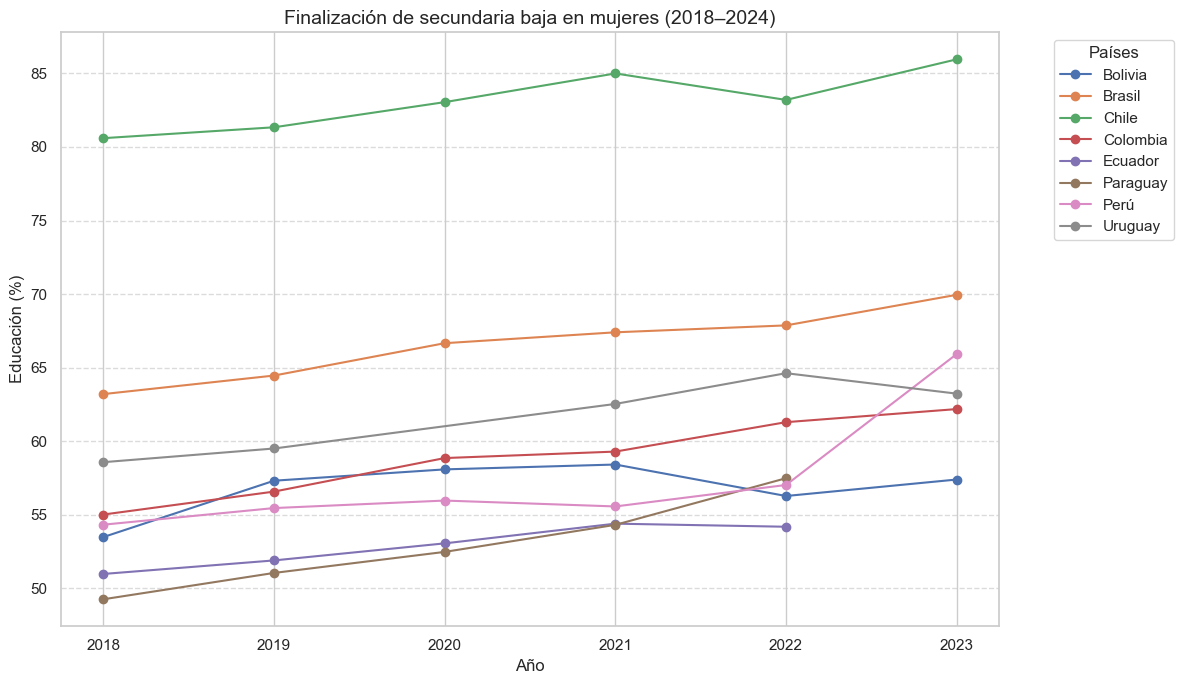

In [70]:
# --- Gráfico de líneas por país (ordenado alfabéticamente)
plt.figure(figsize=(12, 7))  # Crea una figura de tamaño 12x7 pulgadas para el gráfico

for pais in sorted(df["País"].unique()):  # Itera por cada país único en orden alfabético
    sub_df = df[df["País"] == pais]  # Filtra los datos correspondientes al país actual
    plt.plot(sub_df["Año"], sub_df["Educación (%)"], marker="o", label=pais)  # Traza la línea con puntos por cada año para el país

plt.title("Finalización de secundaria baja en mujeres (2018–2024)", fontsize=14)  # Título del gráfico
plt.xlabel("Año")  # Etiqueta del eje X
plt.ylabel("Educación (%)")  # Etiqueta del eje Y
plt.legend(title="Países", bbox_to_anchor=(1.05, 1), loc="upper left")  # Muestra la leyenda fuera del gráfico, a la derecha
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agrega líneas de referencia horizontales con estilo punteado
plt.tight_layout()  # Ajusta automáticamente el diseño para evitar solapamientos
plt.show()  # Muestra el gráfico final


## 📈 Gráfico de líneas por país sobre educación femenina en Sudamérica 

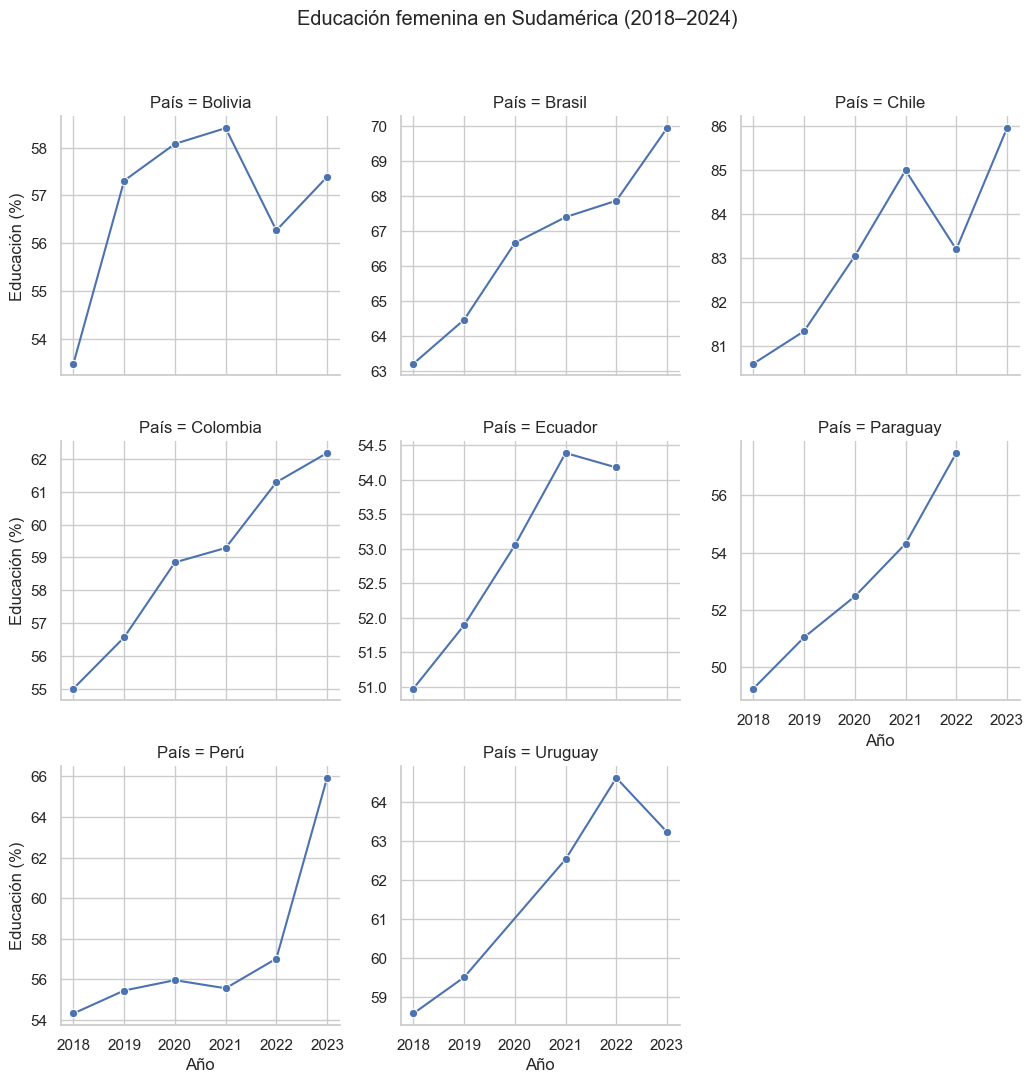

In [74]:
g = sns.FacetGrid(df, col="País", col_wrap=3, height=3.5, sharey=False)  
# Crea una cuadrícula de subgráficos (facet grid) usando Seaborn, donde cada gráfico representa un país diferente.
# - col="País": cada columna representa un país.
# - col_wrap=3: muestra 3 gráficos por fila.
# - height=3.5: altura de cada subgráfico en pulgadas.
# - sharey=False: cada subgráfico tiene su propio eje Y independiente.

g.map(sns.lineplot, "Año", "Educación (%)", marker="o")  
# Mapea un gráfico de líneas (lineplot) en cada subgráfico de la cuadrícula.
# Usa "Año" como eje X y "Educación (%)" como eje Y, marcando cada punto con un círculo.

g.fig.suptitle("Educación femenina en Sudamérica (2018–2024)", y=1.03)  
# Agrega un título general para todos los subgráficos, ajustando la posición vertical con `y=1.03`.

plt.tight_layout()  
# Ajusta automáticamente los espacios entre los subgráficos para evitar solapamiento de etiquetas.

plt.show()  
# Muestra la visualización completa con todos los subgráficos.


## 📊 Gráfico de barras agrupadas de educación femenina en Sudamérica 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6648\1097098373.py:18: UserWarning:

The palette list has more values (12) than needed (6), which may not be intended.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6648\1097098373.py:36: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Arial.

C:\Users\Usuario\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Arial.



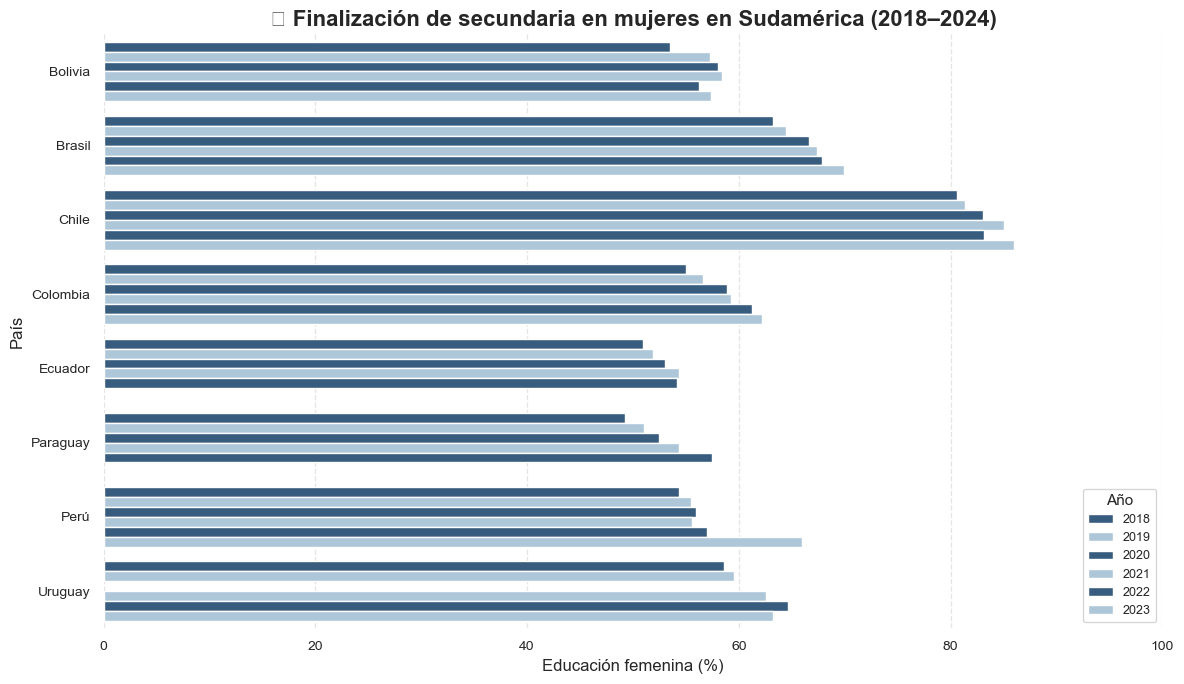

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Estilo bonito y claro
sns.set_theme(style="whitegrid")

# --- Orden por país y año
df_sorted = df.sort_values(["País", "Año"])

# --- Crear figura
plt.figure(figsize=(12, 7))

# --- Paleta personalizada de tonos azules
custom_palette = sns.color_palette(["#2b5c8a", "#a6c8e0", "#2b5c8a", "#a6c8e0", "#2b5c8a", "#a6c8e0",
                                    "#2b5c8a", "#a6c8e0", "#2b5c8a", "#a6c8e0", "#2b5c8a", "#a6c8e0"])

# --- Gráfico de barras
sns.barplot(
    data=df_sorted,
    x="Educación (%)",
    y="País",
    hue="Año",
    palette=custom_palette  # Aplica la paleta azul personalizada
)

# --- Personalización elegante
plt.title("🎓 Finalización de secundaria en mujeres en Sudamérica (2018–2024)", fontsize=16, weight='bold')
plt.xlabel("Educación femenina (%)", fontsize=12)
plt.ylabel("País", fontsize=12)
plt.xlim(0, 100)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Año", title_fontsize=11, fontsize=9, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



In [78]:
# === Calcular promedio de educación femenina por país ===
promedios = df.groupby("País")["Educación (%)"].mean().reset_index()
promedios["Educación (%)"] = promedios["Educación (%)"].round(2)  # Redondear a 2 decimales
promedios = promedios.sort_values(by="Educación (%)", ascending=False)

# Mostrar tabla
print("📌 Promedio de educación femenina secundaria por país (2018–2024):")
print(promedios)


📌 Promedio de educación femenina secundaria por país (2018–2024):
       País  Educación (%)
2     Chile          83.19
1    Brasil          66.59
7   Uruguay          61.69
3  Colombia          58.86
6      Perú          57.37
0   Bolivia          56.82
5  Paraguay          52.91
4   Ecuador          52.90


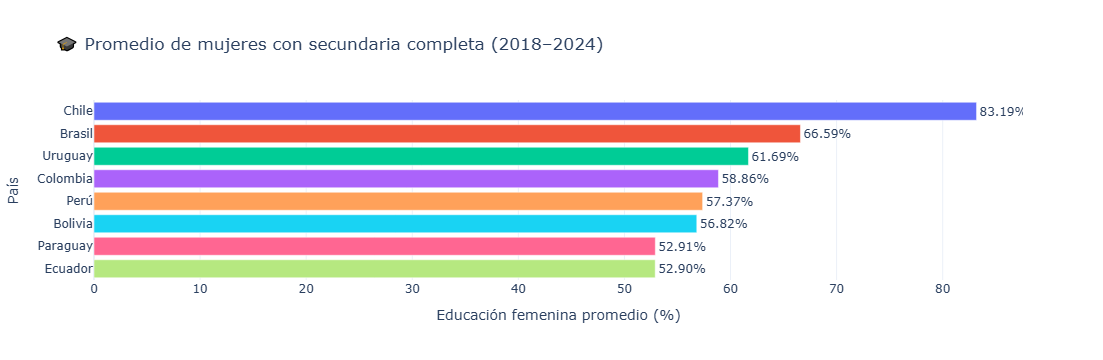

In [79]:
import plotly.express as px

fig = px.bar(
    promedios,
    x="Educación (%)",
    y="País",
    orientation='h',
    title="🎓 Promedio de mujeres con secundaria completa (2018–2024)",
    color="País",
    text="Educación (%)"  # Mostrar el valor sobre la barra
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')  # Mostrar con dos decimales y %
fig.update_layout(
    xaxis_title="Educación femenina promedio (%)",
    yaxis_title="País",
    template="plotly_white",
    height=500,
    showlegend=False
)

fig.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_6648\2533744104.py:18: UserWarning:

The palette list has more values (12) than needed (6), which may not be intended.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6648\2533744104.py:36: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Arial.

C:\Users\Usuario\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) Arial.



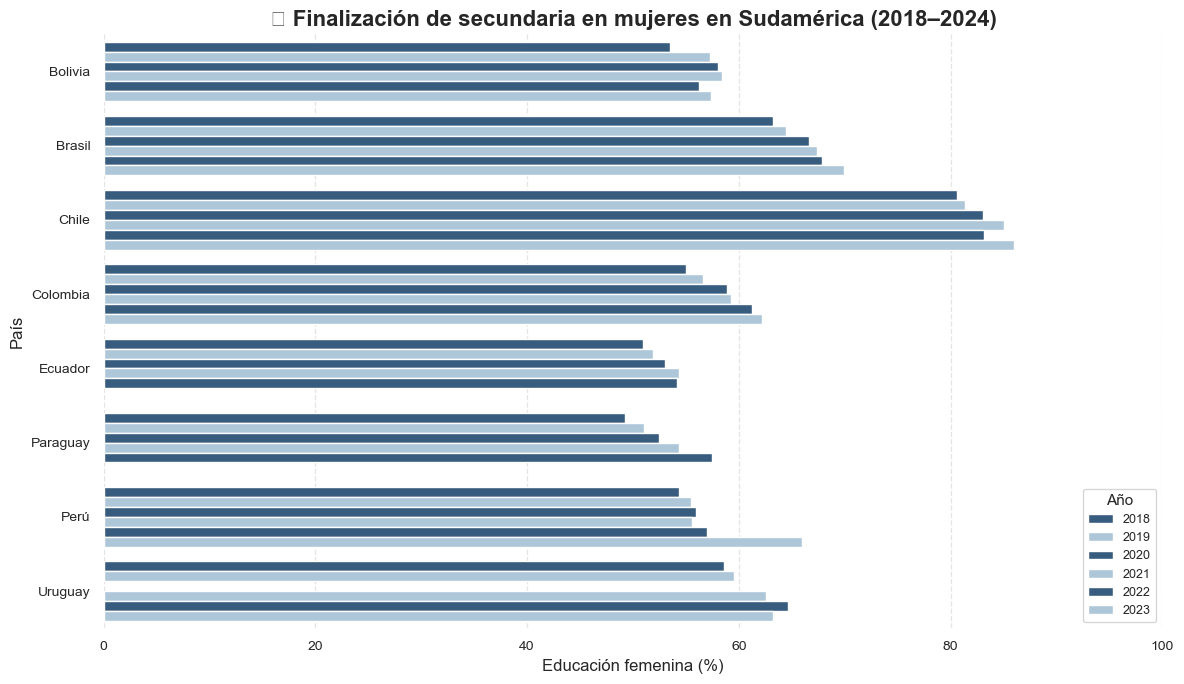

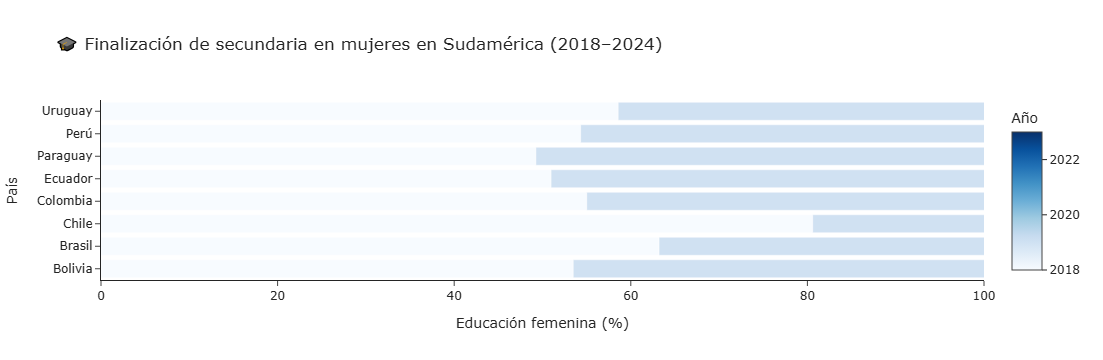

In [81]:
import pandas as pd
import plotly.express as px

# --- Asegúrate de que tu DataFrame esté ordenado si lo deseas
df_sorted = df.sort_values(["País", "Año"])

# --- Crear gráfico de barras horizontal interactivo
fig = px.bar(
    df_sorted,
    x="Educación (%)",
    y="País",
    color="Año",
    orientation='h',
    color_continuous_scale='Blues',  # Paleta azul similar
    title="🎓 Finalización de secundaria en mujeres en Sudamérica (2018–2024)",
    labels={"Educación (%)": "Educación femenina (%)"}
)

# --- Personalización opcional
fig.update_layout(
    xaxis=dict(range=[0, 100]),
    legend_title_text="Año",
    height=700,
    template="simple_white"
)

# --- Mostrar gráfico interactivo
fig.show()


In [1]:
#Inegrando datos de desnutricion
import pandas as pd

# --- Ruta relativa o absoluta al archivo con los datos de desnutrición
ruta_desnutricion = "../script/Desnutricion_Paises/indicadores_sudamerica.xlsx"

# --- Cargar el archivo de desnutrición
df_desnutricion = pd.read_excel(ruta_desnutricion)

# --- Vista previa del archivo cargado
print("📄 Vista previa de los datos de desnutrición:")
print(df_desnutricion.head())


📄 Vista previa de los datos de desnutrición:
    Año       País  Desnutrición (%)  Tasa de Natalidad (por 1000 habitantes)
0  2000  Argentina               NaN                                   19.328
1  2001  Argentina               2.9                                   18.940
2  2002  Argentina               3.7                                   18.702
3  2003  Argentina               4.3                                   18.410
4  2004  Argentina               3.9                                   18.295


In [5]:
import pandas as pd

#  1. Cargar archivo CSV de educación femenina
df_educacion = pd.read_csv("educacion_femenina_sudamerica_2018_2024.csv")

# 2. Renombrar columnas para facilitar la fusión
df_educacion = df_educacion.rename(columns={
    "País": "country",
    "Año": "year",
    "Educación (%)": "educacion_materna"
})

#  Cargar archivo de desnutrición desde Excel
ruta_desnutricion = "../script/Desnutricion_Paises/indicadores_sudamerica.xlsx"
df_desnutricion = pd.read_excel(ruta_desnutricion)

# --- 4. Renombrar columnas para coincidir
df_desnutricion = df_desnutricion.rename(columns={
    "País": "country",
    "Año": "year",
    "Desnutrición (%)": "desnutricion"
})

#  Fusionar los dos DataFrames por país y año
df_merged = pd.merge(df_educacion, df_desnutricion, on=["country", "year"])

# Vista previa de los datos combinados
print("Vista previa del DataFrame combinado:")
print(df_merged.head())



Vista previa del DataFrame combinado:
   Indicador  country  year  educacion_materna  desnutricion  \
0          5  Bolivia  2018              53.48          14.5   
1          4  Bolivia  2019              57.31          14.5   
2          3  Bolivia  2020              58.08          16.9   
3          2  Bolivia  2021              58.41          20.3   
4          1  Bolivia  2022              56.27          23.0   

   Tasa de Natalidad (por 1000 habitantes)  
0                                   22.574  
1                                   22.257  
2                                   21.996  
3                                   21.808  
4                                   21.566  


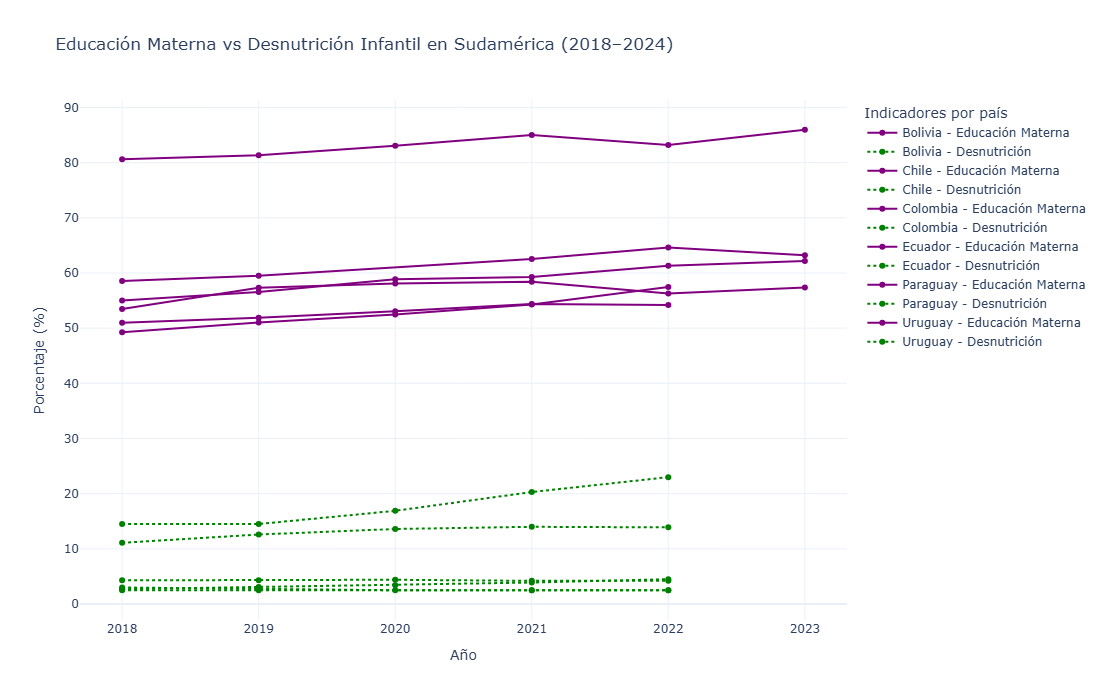

In [21]:
# Instala Plotly y openpyxl si no los tienes
# !pip install plotly openpyxl --quiet

# Importar librerías
import pandas as pd
import plotly.graph_objects as go

# --- 1. Cargar datos de educación
df_educacion = pd.read_csv("educacion_femenina_sudamerica_2018_2024.csv")
df_educacion = df_educacion.rename(columns={
    "País": "country",
    "Año": "year",
    "Educación (%)": "educacion_materna"
})

# --- 2. Cargar datos de desnutrición
ruta_desnutricion = "../script/Desnutricion_Paises/indicadores_sudamerica.xlsx"
df_desnutricion = pd.read_excel(ruta_desnutricion)
df_desnutricion = df_desnutricion.rename(columns={
    "País": "country",
    "Año": "year",
    "Desnutrición (%)": "desnutricion"
})

# --- 3. Unir DataFrames
df_merged = pd.merge(df_educacion, df_desnutricion, on=["country", "year"])

# --- 4. Crear figura
fig = go.Figure()

# --- 5. Agregar líneas por país
for pais in df_merged["country"].unique():
    datos_pais = df_merged[df_merged["country"] == pais]

    # Línea de educación materna
    fig.add_trace(go.Scatter(
        x=datos_pais["year"],
        y=datos_pais["educacion_materna"],
        mode="lines+markers",
        name=f"{pais} - Educación Materna",
        line=dict(dash="solid", color="purple")
    ))

    # Línea de desnutrición
    fig.add_trace(go.Scatter(
        x=datos_pais["year"],
        y=datos_pais["desnutricion"],
        mode="lines+markers",
        name=f"{pais} - Desnutrición",
        line=dict(dash="dot", color="green")
    ))

# --- 6. Personalizar gráfico
fig.update_layout(
    title="Educación Materna vs Desnutrición Infantil en Sudamérica (2018–2024)",
    xaxis_title="Año",
    yaxis_title="Porcentaje (%)",
    legend_title="Indicadores por país",
    height=700,
    template="plotly_white"
)

# --- 7. Mostrar gráfico
fig.show()


## Interpretación del gráfico 

📌 Patrones observados

1.- Tendencia creciente en educación materna:

- En países como Ecuador, Paraguay, Chile y Colombia, se observa un aumento progresivo en la proporción de madres con educación secundaria completa.

- Por ejemplo, Ecuador pasa de aproximadamente 52% en 2018 a más de 60% en 2023.

- Chile y Uruguay mantienen los niveles más altos, superando el 80% durante todo el periodo.

2.- Tendencia decreciente en desnutrición infantil:

- En países como Ecuador y Paraguay, las tasas de desnutrición muestran una disminución constante. Por ejemplo:

- Paraguay reduce la desnutrición de más de 20% en 2018 a alrededor de 15% en 2023.

- Ecuador también muestra una mejora notable.

- En Chile y Uruguay, la desnutrición se mantiene consistentemente baja (menos del 5%).

3.- Relación inversa entre las variables:

- Se evidencia una correlación negativa: a medida que aumenta la educación materna, disminuye la desnutrición infantil.

- Esta relación es particularmente clara en países con mayor crecimiento educativo, como Ecuador y Paraguay, que también reflejan mayores avances nutricionales.

## Conclusión
Mayores niveles de educación materna están vinculados a mejores prácticas nutricionales y, por ende, a menores tasas de desnutrición infantil.